In [2]:
#!/usr/bin/env python

"""
Exploratory data analysis for the results of training the ESPA model for 
classifying EEG spectrograms by phalangeal articulation utilizing LRC neural networks

Robert Valencia
EE 4OJ4/EE 4OH4 Research Project
McMaster University
Supervisor: Dr. James P. Reilly
"""

from json import load
from pandas import DataFrame as df

import numpy as np
import matplotlib.pyplot as plt

epoch_count = 10

with open("results.json", "r") as results_file:
    results = load(results_file)

# replication
# training accuracies
trn_acc = df({trial: metric_values 
              for trial, dsets in results["Replication, 10x sample count"].items()
              for dset, metrics in dsets.items()
              for metric, metric_values in metrics.items()
              if metric == "categorical_accuracy" and dset == "train"})
trn_acc["Average"] = trn_acc.mean(axis=1)

trn_acc

,0,1,2,Average
0,0.516667,0.488889,0.605556,0.537037
1,0.700000,0.544444,0.894444,0.712963
2,0.933333,0.755556,0.961111,0.883333
3,1.000000,0.916667,0.988889,0.968519
4,1.000000,0.983333,1.000000,0.994444
5,1.000000,0.988889,1.000000,0.996296
6,1.000000,1.000000,1.000000,1.000000
7,1.000000,1.000000,1.000000,1.000000
8,1.000000,1.000000,1.000000,1.000000
9,1.000000,1.000000,1.000000,1.000000


In [3]:
# validation accuracies
val_acc = df({trial: metric_values 
              for trial, dsets in results["Replication, 10x sample count"].items()
              for dset, metrics in dsets.items()
              for metric, metric_values in metrics.items()
              if metric == "val_categorical_accuracy" and dset == "train"})
val_acc["Average"] = val_acc.mean(axis=1)

val_acc

,0,1,2,Average
0,0.166667,0.166667,0.500000,0.277778
1,0.166667,0.166667,0.500000,0.277778
2,0.166667,0.166667,0.333333,0.222222
3,0.166667,0.166667,0.333333,0.222222
4,0.166667,0.166667,0.333333,0.222222
5,0.333333,0.166667,0.166667,0.222222
6,0.333333,0.333333,0.166667,0.277778
7,0.333333,0.333333,0.166667,0.277778
8,0.333333,0.333333,0.166667,0.277778
9,0.333333,0.333333,0.166667,0.277778


In [4]:
# testing accuracies
tst_acc = df({trial: [metric_values]*epoch_count 
              for trial, dsets in results["Replication, 10x sample count"].items()
              for dset, metrics in dsets.items()
              for metric, metric_values in metrics.items()
              if metric == "categorical_accuracy" and dset == "test"})
tst_acc["Average"] = tst_acc.mean(axis=1)

tst_acc

,0,1,2,Average
0,0.0625,0.25,0.0,0.104167
1,0.0625,0.25,0.0,0.104167
2,0.0625,0.25,0.0,0.104167
3,0.0625,0.25,0.0,0.104167
4,0.0625,0.25,0.0,0.104167
5,0.0625,0.25,0.0,0.104167
6,0.0625,0.25,0.0,0.104167
7,0.0625,0.25,0.0,0.104167
8,0.0625,0.25,0.0,0.104167
9,0.0625,0.25,0.0,0.104167


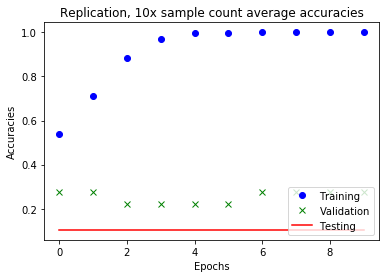

In [5]:
# plot averages
epochs = range(epoch_count)
fig, ax = plt.subplots()
ax.plot(epochs, trn_acc["Average"], "bo", label="Training")
ax.plot(epochs, val_acc["Average"], "gx", label="Validation")
ax.plot(epochs, tst_acc["Average"], "r-", label="Testing")
ax.set_title("Replication, 10x sample count average accuracies")
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracies")
ax.legend(loc="lower right")
plt.show()


In [6]:
# 1% augmentation 
# training accuracies
trn_acc = df({trial: metric_values 
              for trial, dsets in results["1% augmentation, 10x sample count"].items()
              for dset, metrics in dsets.items()
              for metric, metric_values in metrics.items()
              if metric == "categorical_accuracy" and dset == "train"})
trn_acc["Average"] = trn_acc.mean(axis=1)

trn_acc

,0,1,2,Average
0,0.538889,0.394444,0.544444,0.492593
1,0.705556,0.766667,0.705556,0.725926
2,0.855556,0.955556,0.816667,0.875926
3,0.972222,0.988889,0.894444,0.951852
4,0.988889,1.000000,0.950000,0.979630
5,1.000000,1.000000,1.000000,1.000000
6,1.000000,1.000000,1.000000,1.000000
7,1.000000,1.000000,1.000000,1.000000
8,1.000000,1.000000,1.000000,1.000000
9,1.000000,1.000000,1.000000,1.000000


In [7]:
# validation accuracies
val_acc = df({trial: metric_values 
              for trial, dsets in results["1% augmentation, 10x sample count"].items()
              for dset, metrics in dsets.items()
              for metric, metric_values in metrics.items()
              if metric == "val_categorical_accuracy" and dset == "train"})
val_acc["Average"] = val_acc.mean(axis=1)

val_acc

,0,1,2,Average
0,0.216667,0.166667,0.350000,0.244444
1,0.233333,0.333333,0.466667,0.344444
2,0.333333,0.333333,0.500000,0.388889
3,0.333333,0.366667,0.500000,0.400000
4,0.383333,0.366667,0.500000,0.416667
5,0.400000,0.366667,0.500000,0.422222
6,0.433333,0.366667,0.500000,0.433333
7,0.450000,0.366667,0.500000,0.438889
8,0.433333,0.366667,0.500000,0.433333
9,0.433333,0.383333,0.500000,0.438889


In [8]:
# testing accuracies
tst_acc = df({trial: [metric_values]*epoch_count 
              for trial, dsets in results["1% augmentation, 10x sample count"].items()
              for dset, metrics in dsets.items()
              for metric, metric_values in metrics.items()
              if metric == "categorical_accuracy" and dset == "test"})
tst_acc["Average"] = tst_acc.mean(axis=1)

tst_acc

,0,1,2,Average
0,0.6875,0.375,0.1875,0.416667
1,0.6875,0.375,0.1875,0.416667
2,0.6875,0.375,0.1875,0.416667
3,0.6875,0.375,0.1875,0.416667
4,0.6875,0.375,0.1875,0.416667
5,0.6875,0.375,0.1875,0.416667
6,0.6875,0.375,0.1875,0.416667
7,0.6875,0.375,0.1875,0.416667
8,0.6875,0.375,0.1875,0.416667
9,0.6875,0.375,0.1875,0.416667


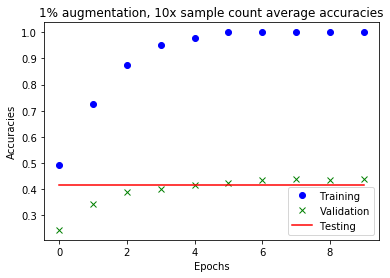

In [9]:
# plot averages
epochs = range(epoch_count)
fig, ax = plt.subplots()
ax.plot(epochs, trn_acc["Average"], "bo", label="Training")
ax.plot(epochs, val_acc["Average"], "gx", label="Validation")
ax.plot(epochs, tst_acc["Average"], "r-", label="Testing")
ax.set_title("1% augmentation, 10x sample count average accuracies")
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracies")
ax.legend(loc="lower right")
plt.show()

In [10]:
# 5% augmentation 
# training accuracies
trn_acc = df({trial: metric_values 
              for trial, dsets in results["5% augmentation, 10x sample count"].items()
              for dset, metrics in dsets.items()
              for metric, metric_values in metrics.items()
              if metric == "categorical_accuracy" and dset == "train"})
trn_acc["Average"] = trn_acc.mean(axis=1)

trn_acc

,0,1,2,Average
0,0.533333,0.433333,0.522222,0.496296
1,0.788889,0.633333,0.683333,0.701852
2,0.844444,0.844444,0.755556,0.814815
3,0.872222,0.938889,0.855556,0.888889
4,0.950000,0.955556,0.916667,0.940741
5,0.983333,0.994444,0.966667,0.981481
6,1.000000,1.000000,0.994444,0.998148
7,1.000000,1.000000,1.000000,1.000000
8,1.000000,1.000000,1.000000,1.000000
9,1.000000,1.000000,1.000000,1.000000


In [11]:
# validation accuracies
val_acc = df({trial: metric_values 
              for trial, dsets in results["5% augmentation, 10x sample count"].items()
              for dset, metrics in dsets.items()
              for metric, metric_values in metrics.items()
              if metric == "val_categorical_accuracy" and dset == "train"})
val_acc["Average"] = val_acc.mean(axis=1)

val_acc

,0,1,2,Average
0,0.000000,0.200000,0.500000,0.233333
1,0.033333,0.166667,0.500000,0.233333
2,0.050000,0.183333,0.500000,0.244444
3,0.050000,0.183333,0.500000,0.244444
4,0.066667,0.250000,0.466667,0.261111
5,0.116667,0.266667,0.483333,0.288889
6,0.166667,0.250000,0.483333,0.300000
7,0.166667,0.250000,0.466667,0.294444
8,0.166667,0.250000,0.466667,0.294444
9,0.166667,0.250000,0.466667,0.294444


In [12]:
# testing accuracies
tst_acc = df({trial: [metric_values]*epoch_count 
              for trial, dsets in results["5% augmentation, 10x sample count"].items()
              for dset, metrics in dsets.items()
              for metric, metric_values in metrics.items()
              if metric == "categorical_accuracy" and dset == "test"})
tst_acc["Average"] = tst_acc.mean(axis=1)

tst_acc

,0,1,2,Average
0,0.28125,0.15625,0.34375,0.260417
1,0.28125,0.15625,0.34375,0.260417
2,0.28125,0.15625,0.34375,0.260417
3,0.28125,0.15625,0.34375,0.260417
4,0.28125,0.15625,0.34375,0.260417
5,0.28125,0.15625,0.34375,0.260417
6,0.28125,0.15625,0.34375,0.260417
7,0.28125,0.15625,0.34375,0.260417
8,0.28125,0.15625,0.34375,0.260417
9,0.28125,0.15625,0.34375,0.260417


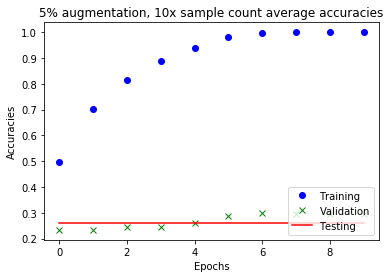

In [13]:
# plot averages
epochs = range(epoch_count)
fig, ax = plt.subplots()
ax.plot(epochs, trn_acc["Average"], "bo", label="Training")
ax.plot(epochs, val_acc["Average"], "gx", label="Validation")
ax.plot(epochs, tst_acc["Average"], "r-", label="Testing")
ax.set_title("5% augmentation, 10x sample count average accuracies")
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracies")
ax.legend(loc="lower right")
plt.show()